# Inargual Project

Imports and set magics:

In [ ]:
from inauguralproject import *

%load_ext autoreload
%autoreload 2

# Question 1

Given that household members (one male and one female) jointly maximizes household utility, we illustrate how the ratio between optimal hours working home between each member changes as alpha and sigma varies:

In [ ]:
def HF_HM_ratio(alpha_values, sigma_values):

    # Create a 3x3 zero-matrix, in which results are stored.
    results = np.zeros([3,3])

    # Loops over entry in lists of alpha values and sigma values.
    for i, alpha in enumerate(alpha_values):
        for j, sigma in enumerate(sigma_values):

            model = HouseholdSpecializationModelClass(alpha=alpha, sigma=sigma)

            model.par.alpha = alpha
            model.par.sigma = sigma

            discrete_output = model.solve_discrete()

            optimalHM = discrete_output.HM
            optimalHF = discrete_output.HF

            if optimalHM == 0:
                print('Divided by zero fail encountered!')
            else:
                results[i,j] = optimalHF / optimalHM

    return results 

# List of values of alpha
alpha_values = [0.25, 0.5, 0.75]
# List of values of sigma
sigma_values = [0.5, 1, 1.5]
# Matrix of discrete outputs  
HFHM = HF_HM_ratio(alpha_values, sigma_values)

print(HFHM)

alpha_values, sigma_values = np.meshgrid(alpha_values,sigma_values,indexing='ij')

fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis
ax.plot_surface(alpha_values,sigma_values,HFHM);
ax.invert_xaxis()


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(alpha_values, sigma_values, HFHM)


ax.invert_xaxis()

ax.set_xticklabels(alpha_values)
ax.set_yticklabels(sigma_values)
ax.set_zticklabels(HFHM)

ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('HFHM')

plt.show()

# Question 2

[5.  4.5 4.5 4.  4. ]
[4.  4.5 4.5 4.5 5. ]


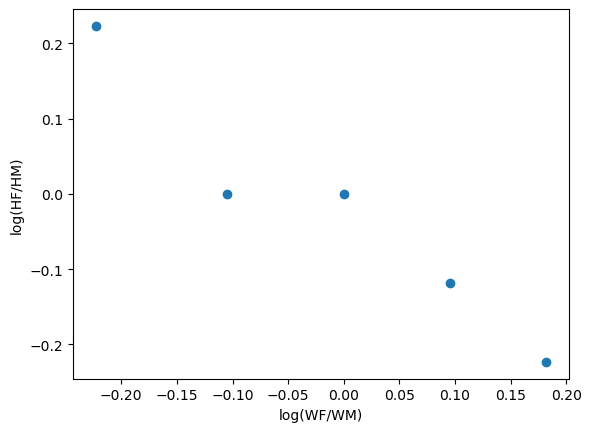

In [4]:
model2 = HouseholdSpecializationModelClass()

WM = 1
WF_list = model2.par.wF_vec

# Calculates optimal choices of HM, LM, HF, LF from discrete choice set given WF values 
OptChoiceDiscrete = model2.solve_wF_vec(discrete=True)

HF = OptChoiceDiscrete[3] # List with optimal HF given logWFWH
HM = OptChoiceDiscrete[1] # List with optimal HM given logWFWH

print(HF)
print(HM)

# Log-transformations

logWFWH_list = np.log(WF_list / WM)
logHFHM_list = np.log(HF / HM)

# Plot scatter of log(WF/WM) against log(HF/HM) given WF values

plt.scatter(logWFWH_list, logHFHM_list)

plt.xlabel("log(WF/WM)")
plt.ylabel("log(HF/HM)")

plt.show()

# Question 3

In [ ]:
# Calculates optimal choices of HM, LM, HF, LF from continouos choice set given WF values 
model3 = HouseholdSpecializationModelClass()
PlotDataContinuous = model3.solve_wF_vec()

HF = PlotDataContinuous[3] # List with optimal HF given logWFWH
HM = PlotDataContinuous[1] # List with optimal HM given logWFWH

print(HF)
print(HM)


# Log-transformation
logHFHM = np.log(HF / HM)

# Plot scatter of log(WF/WM) against log(HF/HM) given WF values
plt.scatter(logWFWH_list, logHFHM)
plt.xlabel("log(WF/WM)")
plt.ylabel("log(HF/HM)")
plt.show()

# Question 4

In [ ]:
model4 = HouseholdSpecializationModelClass()

para_opt = model4.estimate()

alpha_opt = para_opt[0] # Optimal alpha parameter
sigma_opt = para_opt[1] # Optimal sigma parameter

print(f" alpha = {alpha_opt: .3f} and sigma = {sigma_opt: .3f} minimizes the function.")



In [ ]:
model = HouseholdSpecializationModelClass(alpha=0.982, sigma = 0.1)

PlotDataContinuous = model.solve_wF_vec()

HF = PlotDataContinuous[3]
HM = PlotDataContinuous[1]

print(HF)
print(HM)

logHFHM = np.log(HF / HM)

# Plot
plt.scatter(logWFWH_list, logHFHM)
plt.xlabel("log(WF/WM)")
plt.ylabel("log(HF/HM)")
plt.show()